<a href="https://colab.research.google.com/github/IamRash-7/Stock-Price-LSTM/blob/main/Stock_Price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout

# Download Data

This can be done in using pandas datareader. I used tiingo, but yahoo data can also be used



In [60]:
#DISNEY STOCK
df = pdr.get_data_tiingo('DIS', api_key=key)

In [61]:
df.to_csv('DIS.csv')

In [62]:
df = pd.read_csv('DIS.csv')

In [63]:
#Dataset contains 5 years of data
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,DIS,2016-08-12 00:00:00+00:00,96.84,97.82,96.6600,97.82,9356523,92.022474,92.953721,91.851428,92.953721,9356523,0.0,1.0
1,DIS,2016-08-15 00:00:00+00:00,97.10,97.61,96.9200,97.35,5299588,92.269539,92.754168,92.098494,92.507102,5299588,0.0,1.0
2,DIS,2016-08-16 00:00:00+00:00,96.88,97.25,96.2681,96.86,5777756,92.060484,92.412077,91.479024,92.041479,5777756,0.0,1.0
3,DIS,2016-08-17 00:00:00+00:00,96.87,96.97,96.5200,96.84,5697173,92.050981,92.146006,91.718393,92.022474,5697173,0.0,1.0
4,DIS,2016-08-18 00:00:00+00:00,96.65,97.12,96.5500,96.87,5250741,91.841926,92.288544,91.746900,92.050981,5250741,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,DIS,2021-08-04 00:00:00+00:00,172.58,173.25,171.3400,172.50,5665827,172.580000,173.250000,171.340000,172.500000,5665827,0.0,1.0
1253,DIS,2021-08-05 00:00:00+00:00,176.71,177.12,172.4900,172.49,8864174,176.710000,177.120000,172.490000,172.490000,8864174,0.0,1.0
1254,DIS,2021-08-06 00:00:00+00:00,177.13,178.81,176.6300,177.43,5505241,177.130000,178.810000,176.630000,177.430000,5505241,0.0,1.0
1255,DIS,2021-08-09 00:00:00+00:00,176.72,177.31,175.0620,177.00,5338969,176.720000,177.310000,175.062000,177.000000,5338969,0.0,1.0


In [64]:
df1 = df.reset_index()['close']

In [65]:
df1.head()

0    96.84
1    97.10
2    96.88
3    96.87
4    96.65
Name: close, dtype: float64

In [66]:
df1.shape

(1257,)

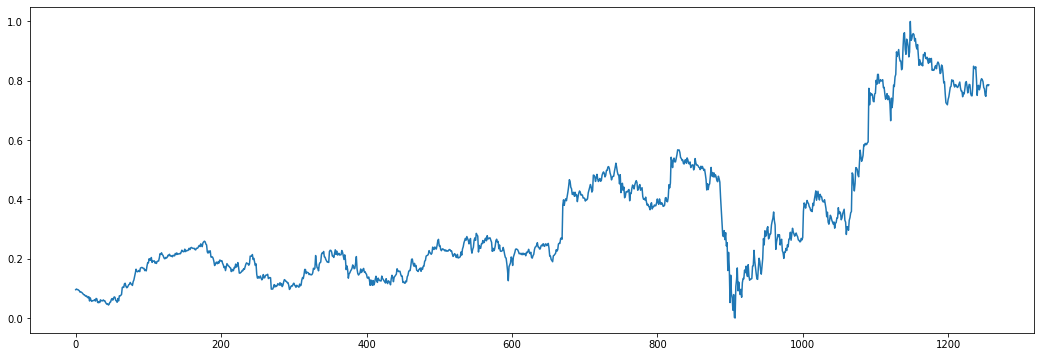

In [107]:
#Visualise Data
plt.figure(figsize=(18,6))
plt.plot(df1)

# DATA PREPERATION

In [68]:
#Scale the data between 0 and 1. LSTMs work better on normalized data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [69]:
df1

array([[0.09539389],
       [0.09763237],
       [0.09573827],
       ...,
       [0.78665519],
       [0.78312527],
       [0.78613861]])

In [70]:
#65% of total data is for training and rest is for testing

train_size = int(len(df1)*0.65)
train_size

817

In [71]:
test_size = len(df1)-train_size
test_size

440

In [72]:
train_dat = df1[:train_size]

In [73]:
test_dat = df1[train_size:]

## Convert data into sequence

LSTMs require sequential data. In this case, price of previous 100 days will be used to predict 101st day price.

In [74]:
def convert_data(dataset, num = 100):
  data_X, data_y = [],[]
  for i in range(len(dataset)-num-1):
    data_X.append(dataset[i:i+num,0])
    data_y.append(dataset[i+num+1,0])
    # convert data to numpy array
  return np.array(data_X),np.array(data_y)

In [75]:
X_train, y_train = convert_data(train_dat)

In [76]:
X_test, y_test = convert_data(test_dat)

In [77]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [78]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [79]:
#reshape input to add extra dimension (batch dimension)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [80]:
X_train.shape, X_test.shape

((716, 100, 1), (339, 100, 1))

# Create Model

In [81]:
# A stacked LSTM model with dropout layers included
# Final Dense layer returns the prediction

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [82]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 7s 187ms/step - loss: 0.0223 - val_loss: 0.0773
Epoch 2/10
12/12 [==============================] - 1s 82ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 3/10
12/12 [==============================] - 1s 82ms/step - loss: 0.0041 - val_loss: 0.0389
Epoch 4/10
12/12 [==============================] - 1s 84ms/step - loss: 0.0028 - val_loss: 0.0088
Epoch 5/10
12/12 [==============================] - 1s 82ms/step - loss: 0.0021 - val_loss: 0.0063
Epoch 6/10
12/12 [==============================] - 1s 83ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 7/10
12/12 [==============================] - 1s 82ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 8/10
12/12 [==============================] - 1s 83ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 9/10
12/12 [==============================] - 1s 83ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 10/10
12/12 [==============================] - 1s 83ms/step - loss: 0.0018 - val_loss: 0.0049


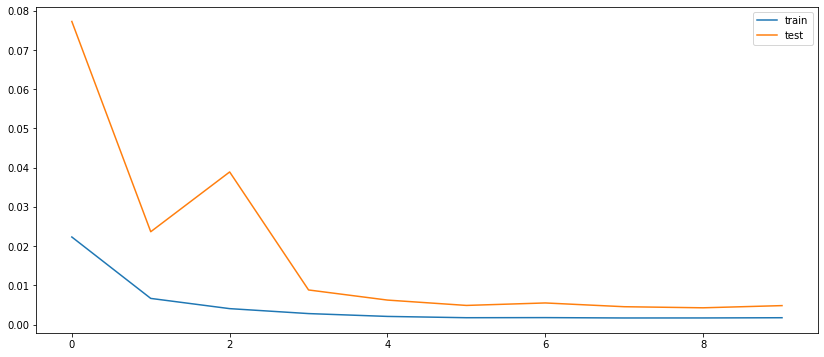

In [106]:
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Compare predictions of our model and actual prices

In [84]:
# Get predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [85]:
# Inverse transform scaled data
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [86]:
# Train Accuracy
math.sqrt(mean_squared_error(y_train,train_predict))

113.68155076115173

*The model has performed really well here*

In [87]:
# Test Accuracy
math.sqrt(mean_squared_error(y_test,test_predict))

150.40261257435836

## Plot Comparision

In [88]:
np.empty_like(df1).shape

(1257, 1)

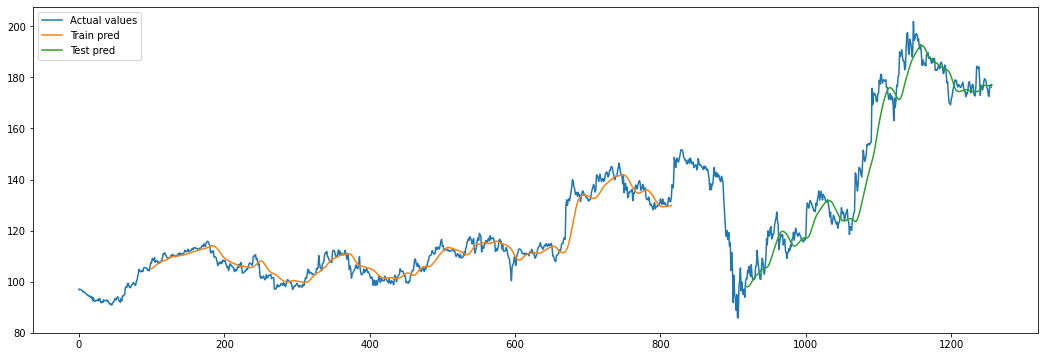

In [111]:
look_back=100

## TRAIN
#create empty array with same shape of df1
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
#shift train predictions by 100 because first 100 inputs will be used to predict first output
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## TEST
#create empty array with same shape of df1
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
#shift train predictions by 100(same as train shift) + trainpred(ignore train preds) + 100(inputs used to predict 1st test value) + 1
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## PLOT
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1), label='Actual values')
plt.plot(trainPredictPlot, label='Train pred')
plt.plot(testPredictPlot, label='Test pred')
plt.legend()
plt.show()

*As we can see from the plot, the model gave us amazing results*

# Make future predictions (30 days)

This can be done by using the data predicted by LSTM as its new input

In [90]:
len(test_dat)

440

In [91]:
#Use 100 days data at the end to predict 101st unkown date
x_input=test_dat[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
len(temp_input)

100

In [94]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    # everything (29 of them) except the first prediction
    if(len(temp_input)>100):
        # take the last 100 elements of the array to predict
        x_input=np.array(temp_input[1:])

        # reshape to match model input shape
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        #predict the price
        yhat = model.predict(x_input, verbose=0)
        print("{} day output : {}".format(i,yhat[0]))

        #append it to the list
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1

    # for first prediction only
    else:
        # reshape to match model input shape
        x_input = x_input.reshape((1, n_steps,1))

        #predict the first price
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))

        #append it to input so that it will be used to predict next day's price
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

0 day output [[0.77477854]]
1 day output : [0.7734595]
2 day output : [0.7722706]
3 day output : [0.77117723]
4 day output : [0.77014935]
5 day output : [0.7691625]
6 day output : [0.7681988]
7 day output : [0.7672456]
8 day output : [0.7662949]
9 day output : [0.7653421]
10 day output : [0.76438516]
11 day output : [0.7634235]
12 day output : [0.76245725]
13 day output : [0.76148725]
14 day output : [0.7605146]
15 day output : [0.7595404]
16 day output : [0.7585652]
17 day output : [0.75759]
18 day output : [0.7566152]
19 day output : [0.7556413]
20 day output : [0.75466835]
21 day output : [0.7536966]
22 day output : [0.7527263]
23 day output : [0.7517574]
24 day output : [0.75078976]
25 day output : [0.74982345]
26 day output : [0.7488585]
27 day output : [0.74789476]
28 day output : [0.7469323]
29 day output : [0.74597096]
[[0.7747785449028015], [0.7734594941139221], [0.7722706198692322], [0.7711772322654724], [0.7701493501663208], [0.7691624760627747], [0.7681987881660461], [0.767

## Plot future prediction

In [95]:
day_new=np.arange(1,100)
day_pred=np.arange(101,131)

In [96]:
len(df1)

1257

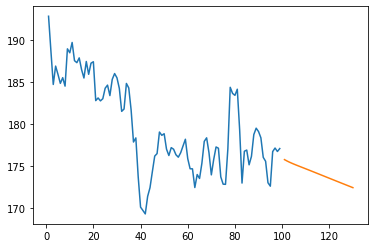

In [97]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# PREDICTED PRICE FOR 11-08-2021

In [101]:
scaler.inverse_transform(lst_output)[0][0]

175.7505279904604

# Actual Price on 11-08-2021

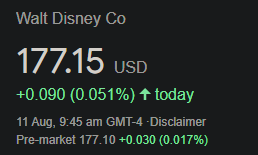

*Not bad, huh ;)*